# Some examples of how to load klayout technology definition

In [10]:
# Reload modules every time code is called. Set autoreload 0 to disable
%load_ext autoreload
%autoreload 2

# Jupyter notebook specific
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import phidl.technology as tech
from phidl import quickplot as qp

In [12]:
print('Initial: ', tech.get_technology_name())  # At first, this picks the last technology used in the klayout application
tech.set_technology_name('OLMAC')

Initial:  OLMAC


In [13]:
# Load in the layer properties, SiEPIC approach
# tech.get_technology()

# Load in the layer properties in phidl LayerSet format
# tech.get_LayerSet()

In [14]:
# Let's say for some reason you want to see the drc files
print(tech.tech_files_matching('*.lydrc'))

['/Users/atait/.klayout/salt/soen_olmac_pdk/tech/OLMAC/drc/OLMAC.lydrc']


## Properties
Files of interest are `.xml`

In [15]:
# load in some properties generically in dict format
# These are hard to navigate and are wrapped by PropertyStructurs, seen below
x = tech.get_properties_from_file()

{'vias': {'via': [{'name': 'NW Pad to Wiring',
    'resistance': '0.0',
    'resistivity': '0.0',
    'layer': 'v3',
    'min_size': '10.0',
    'component': [{'layer': 'm1_nwpad', 'inclusion': '4.0'},
     {'layer': 'm5_wiring', 'inclusion': '2.0'}]},
   {'name': 'LED Pad to Wiring',
    'resistance': '0.0',
    'resistivity': '0.0',
    'layer': None,
    'min_size': '10.0',
    'component': [{'layer': 'm4_ledpad', 'inclusion': '2.0'},
     {'layer': 'm5_wiring', 'inclusion': '1.0'}]},
   {'name': 'Bond Pad',
    'resistance': '0.0',
    'layer': 'v5',
    'min_size': '40.0',
    'component': {'layer': 'm5_wiring', 'inclusion': '5.0'}},
   {'name': 'Probe Pad',
    'resistance': '0.0',
    'layer': 'v5',
    'min_size': '100.0',
    'component': {'layer': 'm5_wiring', 'inclusion': '5.0'}}]},
 'waveguides': {'waveguide': [{'name': 'Strip',
    'radius': '5.0',
    'loss': '0.0',
    'component': {'layer': 'wg_deep', 'width': '0.5', 'offset': '0.0'}},
   {'name': 'Ridge',
    'radius':

### PropertyStructures

In [16]:
# This is how you access
print(tech.waveguides())
tech.waveguides('Strip')

['Strip', 'Ridge']


WGXSection(components=[WGXSectionComponent(layer=wg_deep, width=0.5, offset=0.0)], radius=5.0, loss=0.0)

In [41]:
# References to the same thing give the actual same object
tech.waveguides('Strip') is tech.waveguides('Strip')

True

In [42]:
# Key errors look like this
try:
    tech.waveguides('f')
except KeyError as e:
    print('KeyError:', e)

KeyError: "f. Available: dict_keys(['Strip', 'Ridge'])"


In [50]:
# Some of the PropertyStructures have methods defined, at least for now
x = tech.conductors('Silicon Rib')
print('x is type', x.type, 'with sheet resistance', x.sheet)
y = x.doped_with('N+')
print('y is type', y.type, 'with sheet resistance', y.sheet)

x is type semiconductor with sheet resistance 0.0
y is type semiconductor with sheet resistance 0.0


## Technology driven layout

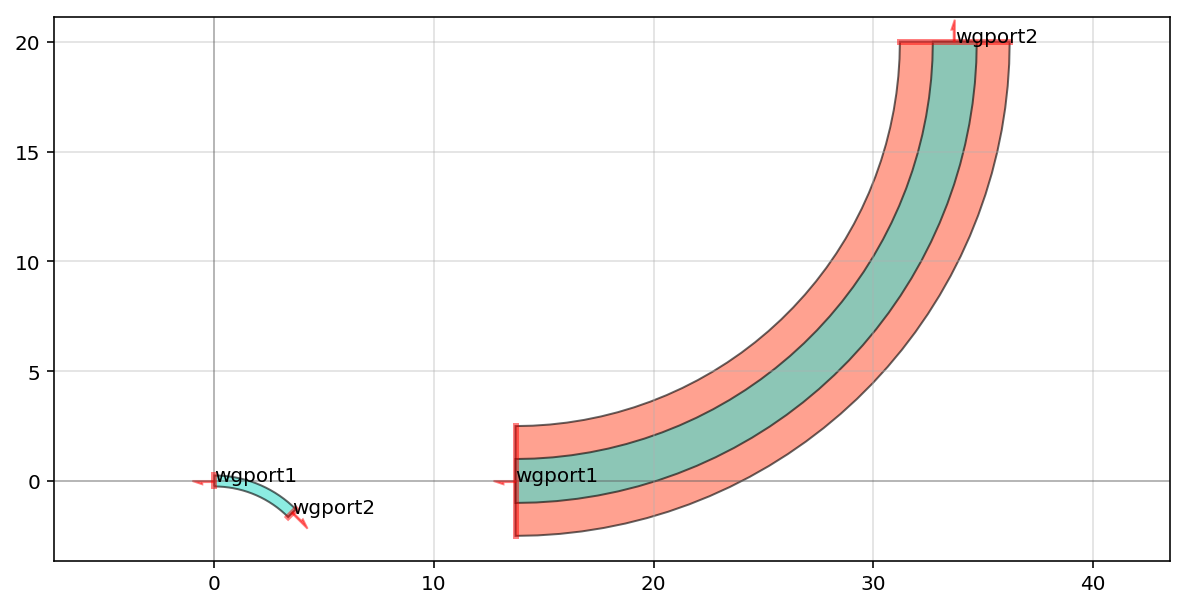

In [20]:
from phidl import Device    

D = Device('bends')
w1 = D.add_ref(tech.waveguides('Strip').cell_bend(theta=-45))
w2 = D.add_ref(tech.waveguides('Ridge').cell_bend())
w2.xmin = w1.xmax + 10
qp(D)

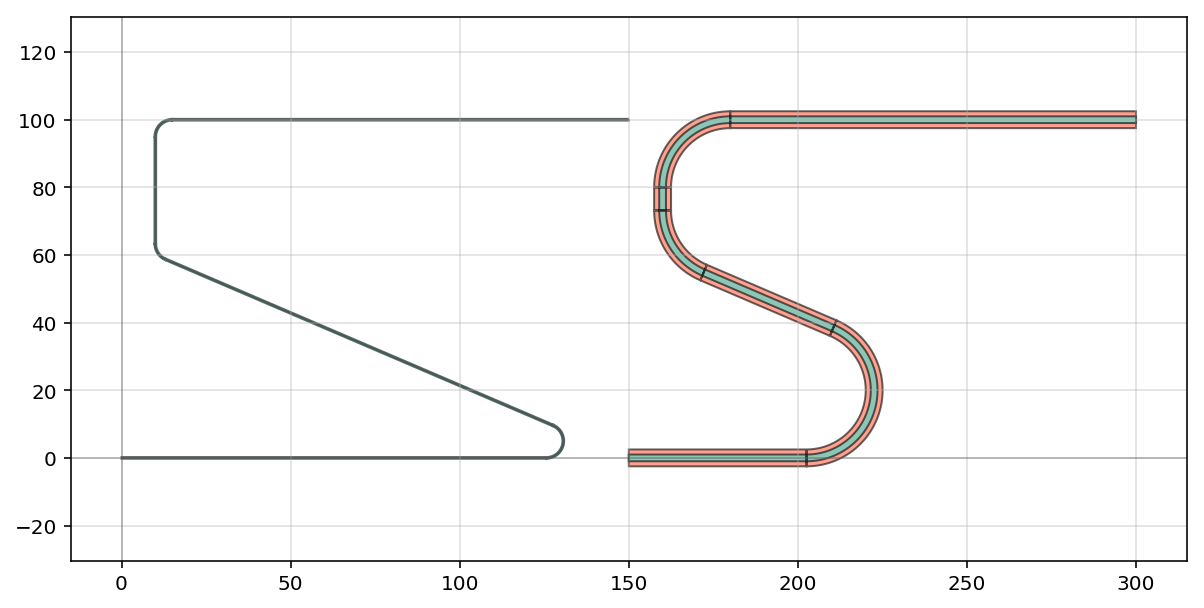

In [21]:
D = Device('routes')
zshape = np.array([(0,0), (150, 0), (10, 60), (10, 100), (150, 100)])
# zshape = np.array([(10,10), (20,30)])
w3 = D.add_ref(tech.waveguides('Strip').cell_points(zshape))
zshape[:,0] = zshape[:,0] + 150
w4 = D.add_ref(tech.waveguides('Ridge').cell_points(zshape))
qp(D)

In [51]:
TR = tech.transitions('Strip to Ridge')
TR

Transition(length=7.0, bezier=0.0, loss=0.0, source=Strip, dest=Ridge)

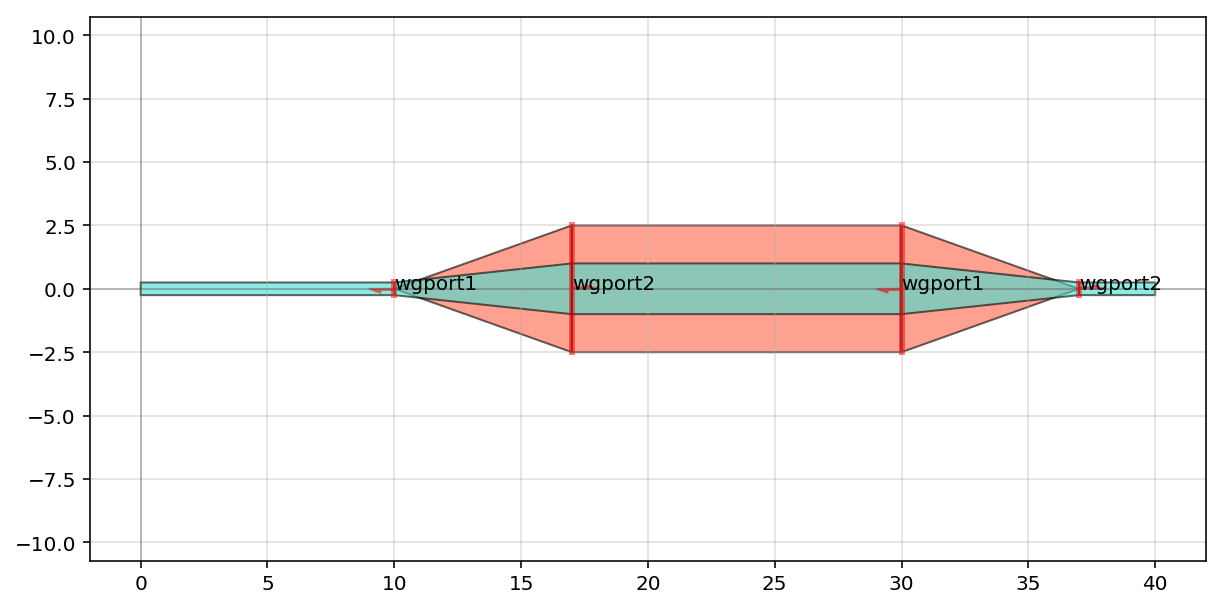

In [52]:
x1 = 10
D = Device()
w1 = D.add_ref(tech.waveguides('Strip').cell_points([(0, 0), (x1, 0)]))

tr = D.add_ref(TR.cell())
tr.move(tr.ports['wgport1'], (x1, 0))

x2 = x1 + TR.length
x3 = 30
w2 = D.add_ref(tech.waveguides('Ridge').cell_points([(x2, 0), (x3, 0)]))

tr = D.add_ref(TR.cell(inverted=True))
tr.move(tr.ports['wgport1'], (x3, 0))

x4 = x3 + TR.length
w2 = D.add_ref(tech.waveguides('Strip').cell_points([(x4, 0), (40, 0)]))

qp(D)

Via(components=[ViaComponent(layer=m1_nwpad, inclusion=4.0), ViaComponent(layer=m5_wiring, inclusion=2.0)], resistance=0.0, resistivity=0.0, layer=v3, min_size=10.0)


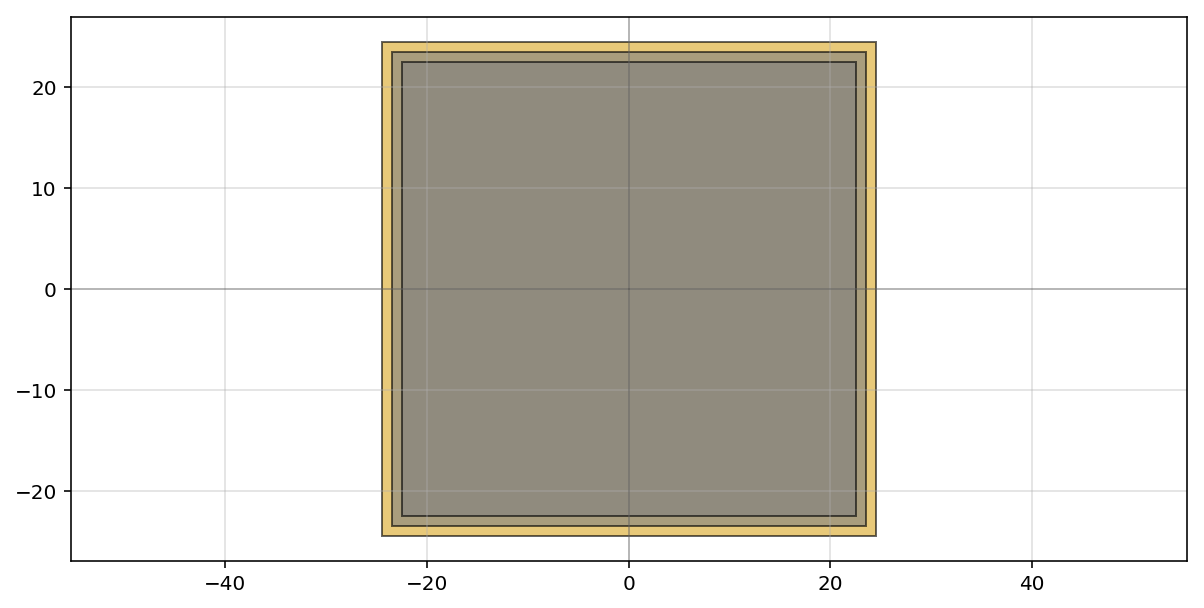

In [55]:
print(tech.vias())
bp = tech.vias('NW Pad to Wiring')
qp(bp.cell(size=45))
print(bp)